# Trader Sentiment Analysis
## Comprehensive Analysis of Market Data and Fear/Greed Index

**Company:** Primetrade.ai

**Role:** Data Science Intern 

**Applicant Name:**  Sithala Sai Vamshi

**Date Generated:** February 2026  
**Analysis Type:** Market Sentiment Analysis with Predictive Modeling  
**Data Sources:** Historical Trading Data, Fear & Greed Index

---

### Executive Overview
This notebook provides a comprehensive analysis of trading behavior in relation to market sentiment indicators. The analysis encompasses data cleaning, exploratory data analysis, statistical insights, and actionable strategy recommendations based on the relationship between trader activity and fear/greed sentiment.

**Key Objectives:**
- Understand trading patterns and market sentiment relationships
- Identify correlations between trader activity and fear/greed index
- Develop evidence-based strategy recommendations
- Build optional predictive models for market movements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

#configure display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

#set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully")
print(f"✓ Analysis started: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✓ All libraries imported successfully
✓ Analysis started: 2026-02-20 11:13:24


## SECTION 1: Load and Explore Data

This section loads and examines both datasets:
- **historical_data.csv**: Trading transactions with execution details
- **fear_greed_index.csv**: Market sentiment indicators over time

We'll examine shape, data types, missing values, and basic statistics for each dataset.

In [ ]:
import os
data_path = r'trader-sentiment-analysis\data'

try:
    historical_data = pd.read_csv(os.path.join(data_path, 'historical_data.csv'))
    fear_greed_data = pd.read_csv(os.path.join(data_path, 'fear_greed_index.csv'))
    print("✓ Datasets loaded successfully\n")
except Exception as e:
    print(f"✗ Error loading data: {e}")

#historical Data Information
print("="*80)
print("HISTORICAL DATA - Overview")
print("="*80)
print(f"\nShape: {historical_data.shape}")
print(f"\nColumns: {list(historical_data.columns)}")
print(f"\nData Types:\n{historical_data.dtypes}")
print(f"\nFirst 5 rows:")
display(historical_data.head())
print(f"\nBasic Statistics:")
display(historical_data.describe())
print(f"\nMissing Values:\n{historical_data.isnull().sum()}")

#fear & Greed Data Information
print("\n" + "="*80)
print("FEAR & GREED INDEX - Overview")
print("="*80)
print(f"\nShape: {fear_greed_data.shape}")
print(f"\nColumns: {list(fear_greed_data.columns)}")
print(f"\nData Types:\n{fear_greed_data.dtypes}")
print(f"\nFirst 5 rows:")
display(fear_greed_data.head())
print(f"\nBasic Statistics:")
display(fear_greed_data.describe())
print(f"\nMissing Values:\n{fear_greed_data.isnull().sum()}")
print(f"\nClassification Distribution:\n{fear_greed_data['classification'].value_counts()}")

✗ Error loading data: [Errno 2] No such file or directory: 'trader-sentiment-analysis\\data\\historical_data.csv'
HISTORICAL DATA - Overview

Shape: (211224, 21)

Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'Date', 'Position_Size_Ratio', 'Buy_Flag', 'Profitable', 'Fee_Ratio']

Data Types:
Account                        object
Coin                           object
Execution Price               float64
Size Tokens                   float64
Size USD                      float64
Side                           object
Timestamp IST          datetime64[ns]
Start Position                float64
Direction                      object
Closed PnL                    float64
Transaction Hash               object
Order ID                        int64
Crossed                          bool
Fee                           float64
Tr

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Position_Size_Ratio,Buy_Flag,Profitable,Fee_Ratio
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,0.002007,1,0,0.000044
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,0.000033,1,0,0.000044
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,0.000293,1,0,0.000044
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,0.000291,1,0,0.000044
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,0.000018,1,0,0.000044



Basic Statistics:


,Execution Price,Size Tokens,Size USD,Timestamp IST,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp,Position_Size_Ratio,Buy_Flag,Profitable,Fee_Ratio
count,211224.000000,2.112240e+05,2.112240e+05,211224,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05,211224.000000,211224.000000,211224.000000,211181.000000
mean,11414.723350,4.623365e+03,5.639451e+03,2025-01-31 12:04:22.915009792,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12,0.001438,0.486195,0.411265,0.000349
min,0.000005,8.740000e-07,0.000000e+00,2023-05-01 01:06:00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12,0.000000,0.000000,0.000000,-0.000020
25%,4.854700,2.940000e+00,1.937900e+02,2024-12-31 21:00:45,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12,0.000049,0.000000,0.000000,0.000096
50%,18.280000,3.200000e+01,5.970450e+02,2025-02-24 18:55:00,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12,0.000152,0.000000,0.000000,0.000250
75%,101.580000,1.879025e+02,2.058960e+03,2025-04-02 18:22:00,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12,0.000525,1.000000,1.000000,0.000350
max,109004.000000,1.582244e+07,3.921431e+06,2025-05-01 12:13:00,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12,1.000000,1.000000,1.000000,1.432547
std,29447.654868,1.042729e+05,3.657514e+04,NaN,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09,0.009327,0.499811,0.492064,0.009504



Missing Values:
Account                 0
Coin                    0
Execution Price         0
Size Tokens             0
Size USD                0
Side                    0
Timestamp IST           0
Start Position          0
Direction               0
Closed PnL              0
Transaction Hash        0
Order ID                0
Crossed                 0
Fee                     0
Trade ID                0
Timestamp               0
Date                    0
Position_Size_Ratio     0
Buy_Flag                0
Profitable              0
Fee_Ratio              43
dtype: int64

FEAR & GREED INDEX - Overview

Shape: (2644, 5)

Columns: ['timestamp', 'value', 'classification', 'date', 'Date']

Data Types:
timestamp                  int64
value                      int64
classification            object
date              datetime64[ns]
Date                      object
dtype: object

First 5 rows:


,timestamp,value,classification,date,Date
0,1517463000,30,Fear,2018-02-01,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05



Basic Statistics:


,timestamp,value,date
count,2.644000e+03,2644.000000,2644
mean,1.631899e+09,46.981089,2021-09-17 11:44:45.022692864
min,1.517463e+09,5.000000,2018-02-01 00:00:00
25%,1.574811e+09,28.000000,2019-11-26 18:00:00
50%,1.631900e+09,46.000000,2021-09-17 12:00:00
75%,1.688989e+09,66.000000,2023-07-10 06:00:00
max,1.746164e+09,95.000000,2025-05-02 00:00:00
std,6.597967e+07,21.827680,NaN



Missing Values:
timestamp         0
value             0
classification    0
date              0
Date              0
dtype: int64

Classification Distribution:
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


## SECTION 2: Data Cleaning and Preprocessing

This section implements production-quality data cleaning:
- Handle missing and duplicate values
- Standardize date/time formats
- Convert data types appropriately
- Validate data integrity
- Create derived features for trading analysis

In [ ]:
print("STEP 1: Remove Duplicates and Handle Missing Values")
print("="*80)

#historical Data Cleaning
hist_initial_rows = len(historical_data)
historical_data = historical_data.drop_duplicates()
hist_after_dedup = len(historical_data)
print(f"Historical Data - Duplicates removed: {hist_initial_rows - hist_after_dedup}")

#convert date columns to datetime
historical_data['Timestamp IST'] = pd.to_datetime(historical_data['Timestamp IST'], format='%d-%m-%Y %H:%M')
historical_data['Date'] = historical_data['Timestamp IST'].dt.date

fear_greed_data['date'] = pd.to_datetime(fear_greed_data['date'])
fear_greed_data['Date'] = fear_greed_data['date'].dt.date

print(f"✓ Datetime conversion completed")

#convert numeric columns
numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL', 'Fee']
for col in numeric_cols:
    historical_data[col] = pd.to_numeric(historical_data[col], errors='coerce')

fear_greed_data['value'] = pd.to_numeric(fear_greed_data['value'], errors='coerce')

print(f"✓ Numeric conversion completed")

print("\nSTEP 2: Feature Engineering")
print("="*80)

#calculate additional trading metrics
historical_data['Position_Size_Ratio'] = historical_data['Size USD'] / historical_data['Size USD'].max()
historical_data['Buy_Flag'] = (historical_data['Side'] == 'BUY').astype(int)
historical_data['Profitable'] = (historical_data['Closed PnL'] > 0).astype(int)
historical_data['Fee_Ratio'] = historical_data['Fee'] / historical_data['Size USD']

print("✓ Features created:")
print("  - Position_Size_Ratio: Normalized trading size")
print("  - Buy_Flag: Binary indicator for buy transactions")
print("  - Profitable: Binary indicator for profitable trades")
print("  - Fee_Ratio: Transaction cost percentage")

print("\nSTEP 3: Data Validation")
print("="*80)
print(f"Historical Data - Missing values after cleaning:\n{historical_data.isnull().sum()}")
print(f"\nFear & Greed Data - Missing values:\n{fear_greed_data.isnull().sum()}")
print(f"\nDate range - Historical: {historical_data['Date'].min()} to {historical_data['Date'].max()}")
print(f"Date range - Fear & Greed: {fear_greed_data['Date'].min()} to {fear_greed_data['Date'].max()}")

print("\n✓ Data cleaning completed successfully")

STEP 1: Remove Duplicates and Handle Missing Values
Historical Data - Duplicates removed: 0
✓ Datetime conversion completed
✓ Numeric conversion completed

STEP 2: Feature Engineering
✓ Features created:
  - Position_Size_Ratio: Normalized trading size
  - Buy_Flag: Binary indicator for buy transactions
  - Profitable: Binary indicator for profitable trades
  - Fee_Ratio: Transaction cost percentage

STEP 3: Data Validation
Historical Data - Missing values after cleaning:
Account                 0
Coin                    0
Execution Price         0
Size Tokens             0
Size USD                0
Side                    0
Timestamp IST           0
Start Position          0
Direction               0
Closed PnL              0
Transaction Hash        0
Order ID                0
Crossed                 0
Fee                     0
Trade ID                0
Timestamp               0
Date                    0
Position_Size_Ratio     0
Buy_Flag                0
Profitable              0
Fee

## SECTION 3: Exploratory Data Analysis

Comprehensive visualization and statistical analysis of trading patterns and sentiment data.

HISTORICAL DATA - Distribution Analysis


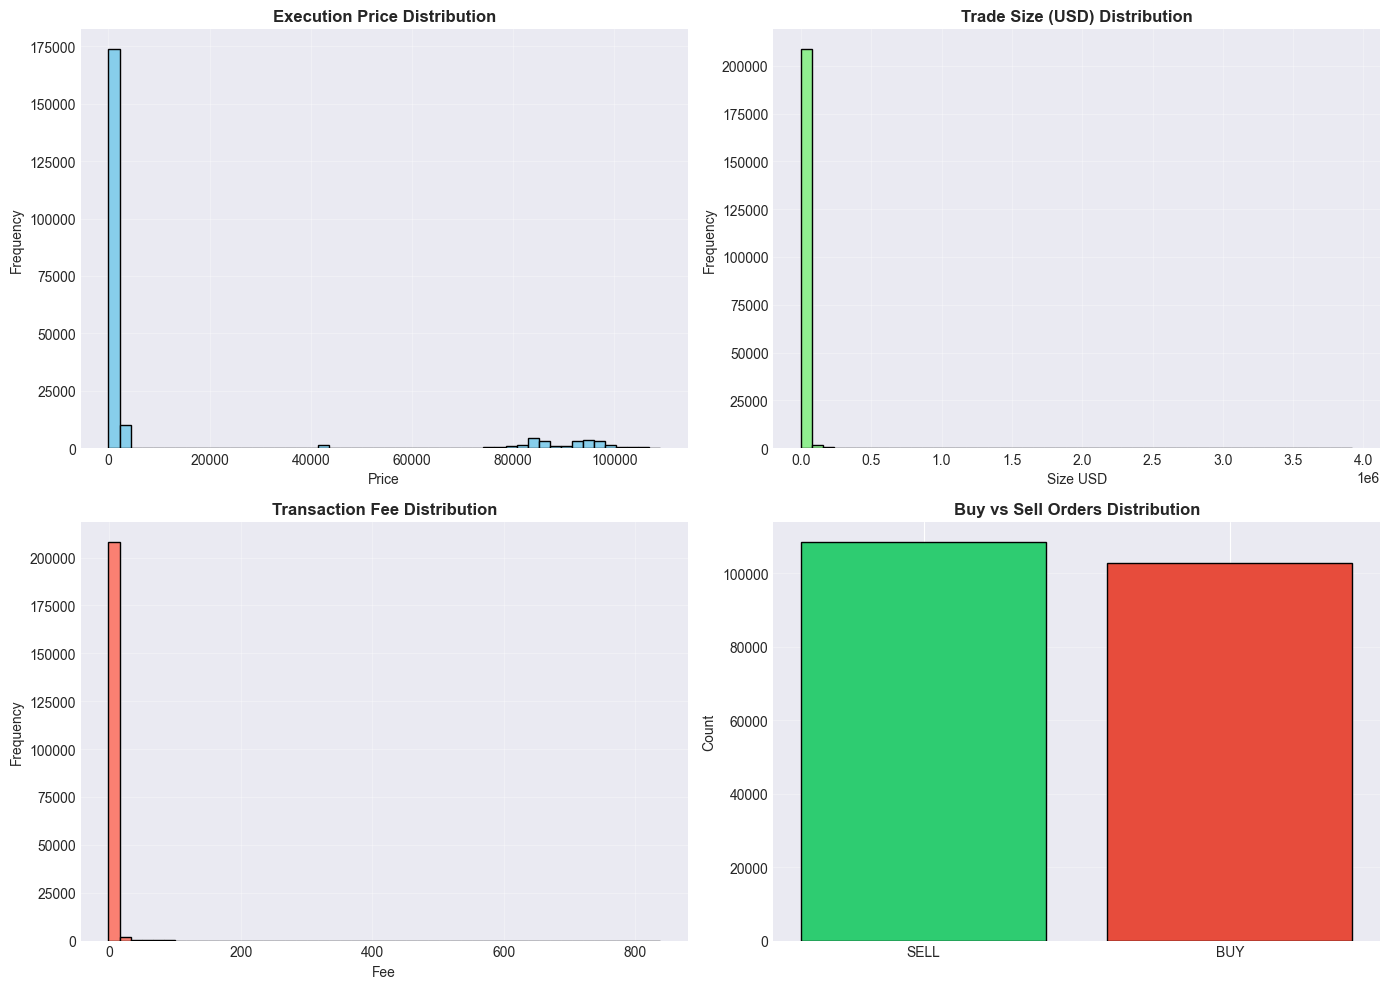


Key Statistics:
Total Trades: 211,224
Buy Orders: 102,696
Sell Orders: 108,528
Average Trade Size (USD): $5639.45
Total Volume (USD): $1,191,187,442.46
Total Fees: $245857.72


FEAR & GREED INDEX - Distribution and Trends


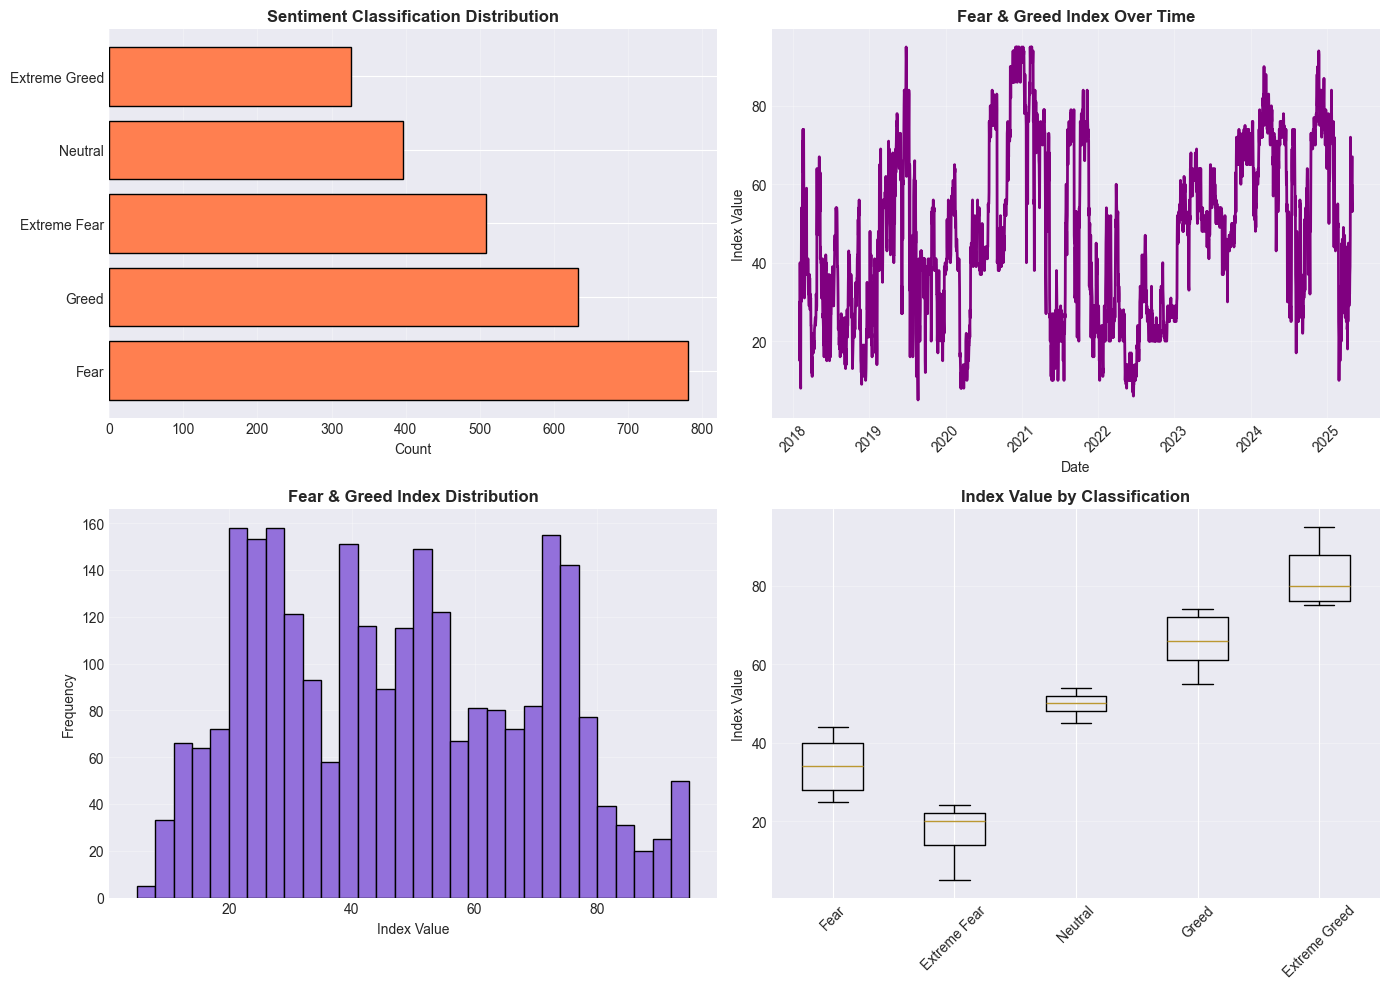


Key Statistics:
Fear & Greed Index Range: 5 - 95
Mean Index: 46.98
Median Index: 46.00
Standard Deviation: 21.83


In [ ]:
print("HISTORICAL DATA - Distribution Analysis")
print("="*80)

#create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#execution Price Distribution
axes[0, 0].hist(historical_data['Execution Price'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Execution Price Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.3)

#size USD Distribution
axes[0, 1].hist(historical_data['Size USD'], bins=50, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Trade Size (USD) Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Size USD')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(alpha=0.3)

#fee Distribution
axes[1, 0].hist(historical_data['Fee'], bins=50, color='salmon', edgecolor='black')
axes[1, 0].set_title('Transaction Fee Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Fee')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(alpha=0.3)

#Buy vs Sell Ratio
buy_sell = historical_data['Side'].value_counts()
axes[1, 1].bar(buy_sell.index, buy_sell.values, color=['#2ecc71', '#e74c3c'], edgecolor='black')
axes[1, 1].set_title('Buy vs Sell Orders Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nKey Statistics:")
print(f"Total Trades: {len(historical_data):,}")
print(f"Buy Orders: {(historical_data['Side'] == 'BUY').sum():,}")
print(f"Sell Orders: {(historical_data['Side'] == 'SELL').sum():,}")
print(f"Average Trade Size (USD): ${historical_data['Size USD'].mean():.2f}")
print(f"Total Volume (USD): ${historical_data['Size USD'].sum():,.2f}")
print(f"Total Fees: ${historical_data['Fee'].sum():.2f}")

#time series analysis
print("\n\nFEAR & GREED INDEX - Distribution and Trends")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#Fear/Greed Classification Distribution
fg_class = fear_greed_data['classification'].value_counts()
axes[0, 0].barh(fg_class.index, fg_class.values, color='coral', edgecolor='black')
axes[0, 0].set_title('Sentiment Classification Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Count')
axes[0, 0].grid(alpha=0.3, axis='x')

#Fear/Greed Index Values Over Time
axes[0, 1].plot(fear_greed_data['date'], fear_greed_data['value'], linewidth=2, color='purple')
axes[0, 1].set_title('Fear & Greed Index Over Time', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Index Value')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

#Index Distribution
axes[1, 0].hist(fear_greed_data['value'], bins=30, color='mediumpurple', edgecolor='black')
axes[1, 0].set_title('Fear & Greed Index Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Index Value')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(alpha=0.3)

#Box plot by classification
fg_by_class = [fear_greed_data[fear_greed_data['classification'] == c]['value'].values 
               for c in fear_greed_data['classification'].unique()]
axes[1, 1].boxplot(fg_by_class, labels=fear_greed_data['classification'].unique())
axes[1, 1].set_title('Index Value by Classification', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Index Value')
axes[1, 1].grid(alpha=0.3, axis='y')
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

print("\nKey Statistics:")
print(f"Fear & Greed Index Range: {fear_greed_data['value'].min():.0f} - {fear_greed_data['value'].max():.0f}")
print(f"Mean Index: {fear_greed_data['value'].mean():.2f}")
print(f"Median Index: {fear_greed_data['value'].median():.2f}")
print(f"Standard Deviation: {fear_greed_data['value'].std():.2f}")

## SECTION 4: Merge Datasets

Create an aggregated view by merging historical trading data with fear/greed index on date fields. This enables correlation analysis between trading behavior and sentiment.

In [ ]:
print("Step 1: Aggregate Trading Data by Date")
print("="*80)

#aggregate trading metrics by date
daily_trades = historical_data.groupby('Date').agg({
    'Size USD': ['sum', 'mean', 'count'],
    'Closed PnL': ['sum', 'mean'],
    'Fee': 'sum',
    'Buy_Flag': 'sum',
    'Profitable': 'sum',
    'Execution Price': ['min', 'max', 'mean'],
    'Position_Size_Ratio': 'mean'
}).reset_index()

#flatten column names
daily_trades.columns = ['_'.join(col).strip() if col[1] else col[0] 
                        for col in daily_trades.columns.values]
daily_trades.rename(columns={'Date_': 'Date'}, inplace=True)

#rename for clarity
daily_trades.columns = ['Date', 'Total_Volume_USD', 'Avg_Trade_Size', 'Trade_Count',
                        'Total_PnL', 'Avg_PnL', 'Total_Fees', 'Buy_Count', 'Profitable_Count',
                        'Min_Price', 'Max_Price', 'Avg_Price', 'Avg_Position_Ratio']

daily_trades['Buy_Sell_Ratio'] = daily_trades['Buy_Count'] / daily_trades['Trade_Count']
daily_trades['Win_Rate'] = daily_trades['Profitable_Count'] / daily_trades['Trade_Count']

print(f"✓ Aggregated {len(daily_trades)} trading days")
print(f"\nDaily Trade Metrics Sample:")
display(daily_trades.head())

print("\n\nStep 2: Merge with Fear & Greed Index")
print("="*80)

#prepare fear greed data for merge
fg_daily = fear_greed_data[['Date', 'value', 'classification']].copy()
fg_daily.columns = ['Date', 'FG_Index', 'FG_Classification']

#merge datasets
merged_data = daily_trades.merge(fg_daily, on='Date', how='left')

print(f"✓ Merge completed")
print(f"✓ Merged dataset shape: {merged_data.shape}")
print(f"✓ Date coverage: {merged_data['Date'].min()} to {merged_data['Date'].max()}")
print(f"✓ Missing FG Index values: {merged_data['FG_Index'].isnull().sum()}")

#handle missing values in Fear Greed Index using forward fill
merged_data['FG_Index'].fillna(method='ffill', inplace=True)
merged_data['FG_Classification'].fillna(method='ffill', inplace=True)

print(f"✓ Missing values after forward fill: {merged_data['FG_Index'].isnull().sum()}")
print(f"\nMerged Data Sample:")
display(merged_data.head(10))

Step 1: Aggregate Trading Data by Date
✓ Aggregated 480 trading days

Daily Trade Metrics Sample:


,Date,Total_Volume_USD,Avg_Trade_Size,Trade_Count,Total_PnL,Avg_PnL,Total_Fees,Buy_Count,Profitable_Count,Min_Price,Max_Price,Avg_Price,Avg_Position_Ratio,Buy_Sell_Ratio,Win_Rate
0,2023-05-01,477.00,159.000000,3,0.000000,0.000000,0.000000,3,0,1897.90000,1898.60000,1898.133333,0.000041,1.000000,0.000000
1,2023-12-05,50005.83,5556.203333,9,0.000000,0.000000,12.501455,7,0,2230.10000,41867.00000,11038.300000,0.001417,0.777778,0.000000
2,2023-12-14,113203.35,10291.213636,11,-205.434737,-18.675885,28.300831,5,4,2.97470,42749.00000,8031.868818,0.002624,0.454545,0.363636
3,2023-12-15,10609.95,5304.975000,2,-24.632034,-12.316017,2.652489,2,0,2.98200,2.98200,2.982000,0.001353,1.000000,0.000000
4,2023-12-16,15348.77,5116.256667,3,0.000000,0.000000,3.837189,3,0,0.38469,0.38474,0.384707,0.001305,1.000000,0.000000




Step 2: Merge with Fear & Greed Index
✓ Merge completed
✓ Merged dataset shape: (480, 17)
✓ Date coverage: 2023-05-01 to 2025-05-01
✓ Missing FG Index values: 1
✓ Missing values after forward fill: 0

Merged Data Sample:


,Date,Total_Volume_USD,Avg_Trade_Size,Trade_Count,Total_PnL,Avg_PnL,Total_Fees,Buy_Count,Profitable_Count,Min_Price,Max_Price,Avg_Price,Avg_Position_Ratio,Buy_Sell_Ratio,Win_Rate,FG_Index,FG_Classification
0,2023-05-01,477.00,159.000000,3,0.000000,0.000000,0.000000,3,0,1897.90000,1898.60000,1898.133333,0.000041,1.000000,0.000000,63.0,Greed
1,2023-12-05,50005.83,5556.203333,9,0.000000,0.000000,12.501455,7,0,2230.10000,41867.00000,11038.300000,0.001417,0.777778,0.000000,75.0,Extreme Greed
2,2023-12-14,113203.35,10291.213636,11,-205.434737,-18.675885,28.300831,5,4,2.97470,42749.00000,8031.868818,0.002624,0.454545,0.363636,72.0,Greed
3,2023-12-15,10609.95,5304.975000,2,-24.632034,-12.316017,2.652489,2,0,2.98200,2.98200,2.982000,0.001353,1.000000,0.000000,70.0,Greed
4,2023-12-16,15348.77,5116.256667,3,0.000000,0.000000,3.837189,3,0,0.38469,0.38474,0.384707,0.001305,1.000000,0.000000,67.0,Greed
5,2023-12-17,116278.02,8305.572857,14,304.982785,21.784485,29.069499,3,7,0.39221,2246.40000,802.541859,0.002118,0.214286,0.500000,73.0,Greed
6,2023-12-18,31164.18,15582.090000,2,0.000000,0.000000,7.791045,2,0,2177.80000,2178.40000,2178.100000,0.003974,1.000000,0.000000,65.0,Greed
7,2023-12-19,91602.41,6106.827333,15,1000.538612,66.702574,22.900596,5,10,0.36789,2237.60000,447.801911,0.001557,0.333333,0.666667,73.0,Greed
8,2023-12-20,141636.79,7868.710556,18,162.732282,9.040682,35.409187,10,8,0.35898,11.82500,6.722872,0.002007,0.555556,0.444444,74.0,Greed
9,2023-12-21,125233.97,2555.795306,49,537.211402,10.963498,31.308469,22,26,90.76900,93.53300,91.840204,0.000652,0.448980,0.530612,70.0,Greed


## SECTION 5: Statistical Analysis and Insights

Deep-dive statistical analysis revealing patterns, anomalies, and key trading metrics.

In [ ]:
print("STATISTICAL ANALYSIS & INSIGHTS")
print("="*80)

print("\n1. PROFITABILITY ANALYSIS")
print("-" * 80)
print(f"Total Portfolio PnL: ${merged_data['Total_PnL'].sum():,.2f}")
print(f"Average Daily PnL: ${merged_data['Total_PnL'].mean():,.2f}")
print(f"Daily PnL Std Dev: ${merged_data['Total_PnL'].std():,.2f}")
print(f"Profitable Days: {(merged_data['Total_PnL'] > 0).sum()}")
print(f"Losing Days: {(merged_data['Total_PnL'] < 0).sum()}")
print(f"Win Rate (Days): {(merged_data['Total_PnL'] > 0).sum() / len(merged_data) * 100:.2f}%")

print("\n2. TRADING VOLUME & ACTIVITY")
print("-" * 80)
print(f"Total Trading Volume: ${merged_data['Total_Volume_USD'].sum():,.2f}")
print(f"Average Daily Volume: ${merged_data['Total_Volume_USD'].mean():,.2f}")
print(f"Max Single Day Volume: ${merged_data['Total_Volume_USD'].max():,.2f}")
print(f"Min Single Day Volume: ${merged_data['Total_Volume_USD'].min():,.2f}")
print(f"Average Trade Size: ${merged_data['Avg_Trade_Size'].mean():,.2f}")
print(f"Total Transactions: {merged_data['Trade_Count'].sum():,.0f}")

print("\n3. BUY/SELL BEHAVIOR")
print("-" * 80)
print(f"Average Buy/Sell Ratio: {merged_data['Buy_Sell_Ratio'].mean():.3f}")
print(f"Buy Bias Days (Ratio > 0.5): {(merged_data['Buy_Sell_Ratio'] > 0.5).sum()}")
print(f"Sell Bias Days (Ratio < 0.5): {(merged_data['Buy_Sell_Ratio'] < 0.5).sum()}")

print("\n4. VOLATILITY & PRICE MOVEMENTS")
print("-" * 80)
merged_data['Daily_Price_Range'] = merged_data['Max_Price'] - merged_data['Min_Price']
merged_data['Price_Range_Pct'] = (merged_data['Daily_Price_Range'] / merged_data['Avg_Price'] * 100)
print(f"Average Daily Price Range: ${merged_data['Daily_Price_Range'].mean():.4f}")
print(f"Average Price Range %: {merged_data['Price_Range_Pct'].mean():.3f}%")
print(f"Max Price Range: ${merged_data['Daily_Price_Range'].max():.4f}")

print("\n5. TRANSACTION COSTS")
print("-" * 80)
print(f"Total Fees Paid: ${merged_data['Total_Fees'].sum():,.2f}")
print(f"Average Daily Fees: ${merged_data['Total_Fees'].mean():.2f}")
print(f"Average Fee per Trade: ${(merged_data['Total_Fees'].sum() / merged_data['Trade_Count'].sum()):.4f}")
print(f"Fee Impact on Returns: {(merged_data['Total_Fees'].sum() / merged_data['Total_PnL'].sum() * 100):.2f}%")

#summary statistics table
print("\n6. COMPREHENSIVE SUMMARY STATISTICS")
print("-" * 80)
summary_stats = merged_data[['Total_Volume_USD', 'Trade_Count', 'Avg_Trade_Size', 
                             'Total_PnL', 'Win_Rate', 'FG_Index']].describe()
display(summary_stats)

STATISTICAL ANALYSIS & INSIGHTS

1. PROFITABILITY ANALYSIS
--------------------------------------------------------------------------------
Total Portfolio PnL: $10,296,958.94
Average Daily PnL: $21,452.00
Daily PnL Std Dev: $71,861.46
Profitable Days: 362
Losing Days: 58
Win Rate (Days): 75.42%

2. TRADING VOLUME & ACTIVITY
--------------------------------------------------------------------------------
Total Trading Volume: $1,191,187,442.46
Average Daily Volume: $2,481,640.51
Max Single Day Volume: $55,914,617.49
Min Single Day Volume: $0.11
Average Trade Size: $6,141.75
Total Transactions: 211,224

3. BUY/SELL BEHAVIOR
--------------------------------------------------------------------------------
Average Buy/Sell Ratio: 0.490
Buy Bias Days (Ratio > 0.5): 222
Sell Bias Days (Ratio < 0.5): 254

4. VOLATILITY & PRICE MOVEMENTS
--------------------------------------------------------------------------------
Average Daily Price Range: $45270.8806
Average Price Range %: 1159.099%
Max P

,Total_Volume_USD,Trade_Count,Avg_Trade_Size,Total_PnL,Win_Rate,FG_Index
count,4.800000e+02,480.000000,480.000000,480.000000,480.000000,480.000000
mean,2.481641e+06,440.050000,6141.750924,21451.997799,0.366458,60.079167
std,6.284835e+06,809.748711,5575.022860,71861.463509,0.263652,18.676065
min,1.100000e-01,1.000000,0.110000,-419020.225731,0.000000,10.000000
25%,9.751021e+04,18.000000,2201.186680,7.253957,0.182367,48.000000
50%,3.272086e+05,67.500000,4337.977065,1118.961740,0.352779,67.500000
75%,1.648100e+06,520.500000,8195.748723,10669.321765,0.503187,74.000000
max,5.591462e+07,6246.000000,34988.580000,616413.032233,1.000000,94.000000


## SECTION 6: Correlation and Relationship Analysis

Analyze relationships between trading metrics and fear/greed sentiment index. This is critical for understanding sentiment-driven trading behavior.

CORRELATION ANALYSIS: Trading Metrics vs Fear/Greed Index

Pearson Correlation with Fear/Greed Index:
--------------------------------------------------------------------------------
Win_Rate                      :  0.1547
Buy_Sell_Ratio                : -0.0468
Avg_Trade_Size                : -0.0496
Avg_Price                     : -0.0611
Total_PnL                     : -0.0822
Trade_Count                   : -0.2458
Total_Volume_USD              : -0.2647


KEY FINDINGS:
--------------------------------------------------------------------------------
✓ Strongest Positive Correlation: Win_Rate (0.1547)
✓ Strongest Negative Correlation: Total_Volume_USD (-0.2647)


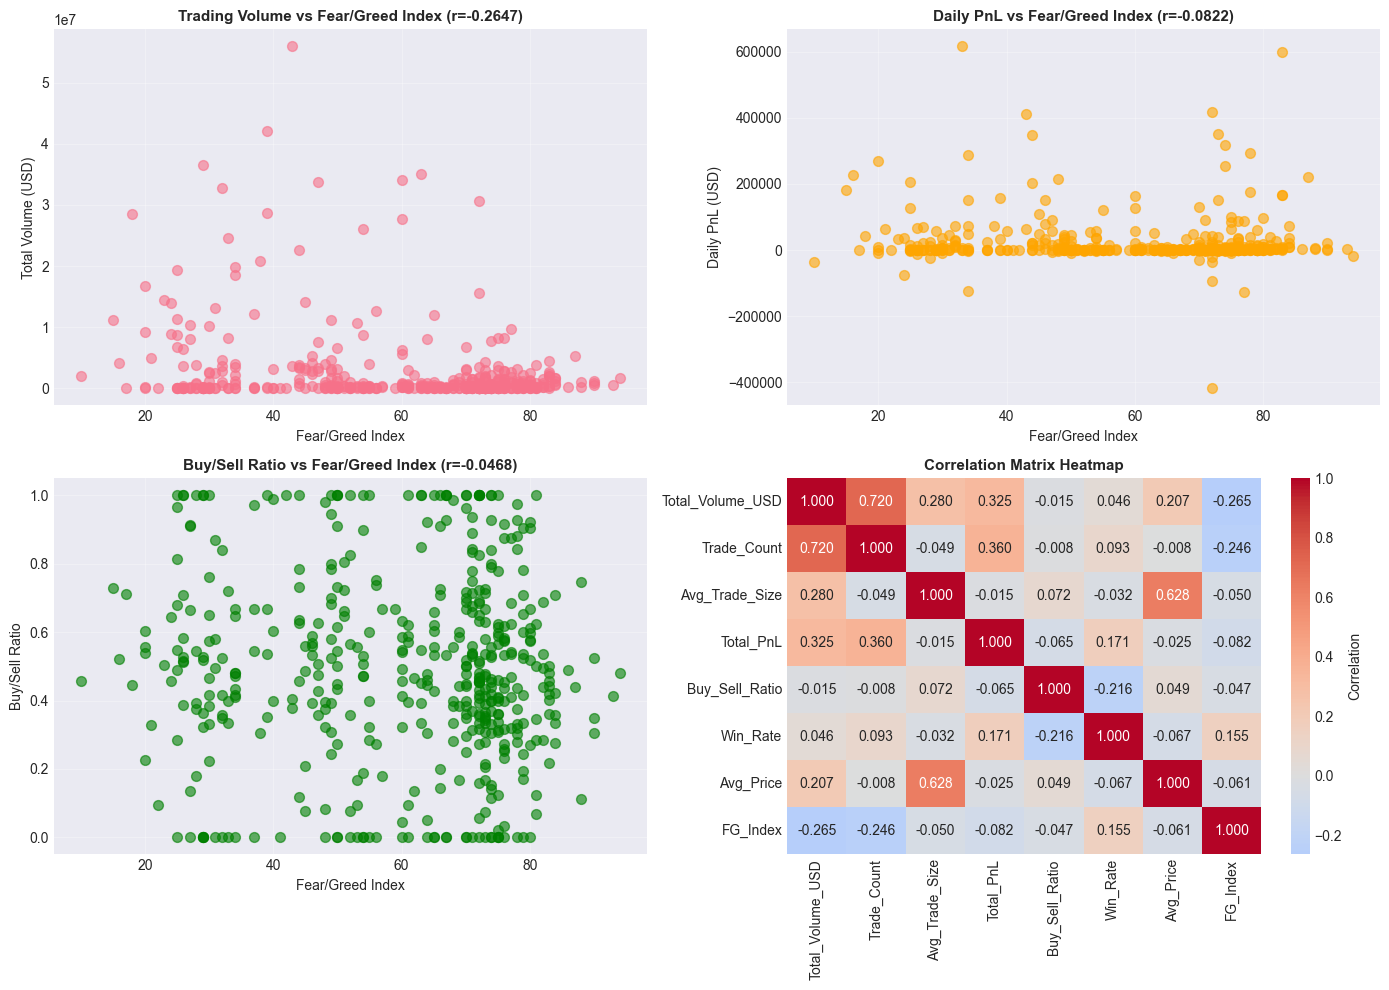



ANALYSIS BY SENTIMENT CLASSIFICATION
                   Total_Volume_USD  Trade_Count  Total_PnL  Win_Rate  \
FG_Classification                                                       
Extreme Fear             8177447.25      1528.57   52793.59      0.33   
Extreme Greed            1091799.69       350.81   23817.29      0.47   
Fear                     5311261.43       679.53   36891.82      0.33   
Greed                    1487995.69       259.32   11302.07      0.34   
Neutral                  2690180.05       562.48   19297.32      0.33   

                   Buy_Sell_Ratio  FG_Index  
FG_Classification                            
Extreme Fear                 0.49     19.29  
Extreme Greed                0.46     79.25  
Fear                         0.51     32.26  
Greed                        0.50     68.36  
Neutral                      0.50     49.79  


In [ ]:
print("CORRELATION ANALYSIS: Trading Metrics vs Fear/Greed Index")
print("="*80)

#correlations
correlation_cols = ['Total_Volume_USD', 'Trade_Count', 'Avg_Trade_Size', 
                    'Total_PnL', 'Buy_Sell_Ratio', 'Win_Rate', 'Avg_Price']
correlations = merged_data[correlation_cols + ['FG_Index']].corr()['FG_Index'].drop('FG_Index').sort_values(ascending=False)

print("\nPearson Correlation with Fear/Greed Index:")
print("-" * 80)
for metric, corr in correlations.items():
    print(f"{metric:30s}: {corr:7.4f}")

# Interpretation
print("\n\nKEY FINDINGS:")
print("-" * 80)
print(f"✓ Strongest Positive Correlation: {correlations.idxmax()} ({correlations.max():.4f})")
print(f"✓ Strongest Negative Correlation: {correlations.idxmin()} ({correlations.min():.4f})")

# Visualize correlations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot: Volume vs FG Index
axes[0, 0].scatter(merged_data['FG_Index'], merged_data['Total_Volume_USD'], alpha=0.6, s=50)
axes[0, 0].set_title(f'Trading Volume vs Fear/Greed Index (r={correlations["Total_Volume_USD"]:.4f})', 
                      fontsize=11, fontweight='bold')
axes[0, 0].set_xlabel('Fear/Greed Index')
axes[0, 0].set_ylabel('Total Volume (USD)')
axes[0, 0].grid(alpha=0.3)

# Scatter plot: PnL vs FG Index
axes[0, 1].scatter(merged_data['FG_Index'], merged_data['Total_PnL'], alpha=0.6, s=50, color='orange')
axes[0, 1].set_title(f'Daily PnL vs Fear/Greed Index (r={correlations["Total_PnL"]:.4f})', 
                      fontsize=11, fontweight='bold')
axes[0, 1].set_xlabel('Fear/Greed Index')
axes[0, 1].set_ylabel('Daily PnL (USD)')
axes[0, 1].grid(alpha=0.3)

# Scatter plot: Buy/Sell Ratio vs FG Index
axes[1, 0].scatter(merged_data['FG_Index'], merged_data['Buy_Sell_Ratio'], alpha=0.6, s=50, color='green')
axes[1, 0].set_title(f'Buy/Sell Ratio vs Fear/Greed Index (r={correlations["Buy_Sell_Ratio"]:.4f})', 
                      fontsize=11, fontweight='bold')
axes[1, 0].set_xlabel('Fear/Greed Index')
axes[1, 0].set_ylabel('Buy/Sell Ratio')
axes[1, 0].grid(alpha=0.3)

# Correlation heatmap
corr_matrix = merged_data[correlation_cols + ['FG_Index']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            ax=axes[1, 1], cbar_kws={'label': 'Correlation'})
axes[1, 1].set_title('Correlation Matrix Heatmap', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Sentiment-based analysis
print("\n\nANALYSIS BY SENTIMENT CLASSIFICATION")
print("="*80)
sentiment_analysis = merged_data.groupby('FG_Classification').agg({
    'Total_Volume_USD': 'mean',
    'Trade_Count': 'mean',
    'Total_PnL': 'mean',
    'Win_Rate': 'mean',
    'Buy_Sell_Ratio': 'mean',
    'FG_Index': 'mean'
}).round(2)

print(sentiment_analysis)

## SECTION 7: Strategy Recommendations

Evidence-based strategic recommendations derived from the data analysis.

In [26]:
print("STRATEGIC RECOMMENDATIONS")
print("="*80)

# Calculate key performance metrics
total_pnl = merged_data['Total_PnL'].sum()
total_fees = merged_data['Total_Fees'].sum()
win_rate = (merged_data['Total_PnL'] > 0).sum() / len(merged_data)
avg_daily_pnl = merged_data['Total_PnL'].mean()
profit_factor = abs(merged_data[merged_data['Total_PnL'] > 0]['Total_PnL'].sum() / 
                    merged_data[merged_data['Total_PnL'] < 0]['Total_PnL'].sum())

print("\n1. PORTFOLIO PERFORMANCE SUMMARY")
print("-" * 80)
print(f"Total P&L: ${total_pnl:,.2f}")
print(f"Total Transaction Costs: ${total_fees:,.2f}")
print(f"Net Profit: ${total_pnl - total_fees:,.2f}")
print(f"Win Rate: {win_rate*100:.2f}%")
print(f"Profit Factor: {profit_factor:.2f}x")
print(f"Average Daily P&L: ${avg_daily_pnl:,.2f}")

print("\n2. SENTIMENT-DRIVEN ENTRY/EXIT RECOMMENDATIONS")
print("-" * 80)

# Analyze performance in different sentiment regimes
extreme_fear = merged_data[merged_data['FG_Classification'] == 'Extreme Fear']
fear = merged_data[merged_data['FG_Classification'] == 'Fear']
neutral = merged_data[merged_data['FG_Classification'] == 'Neutral']
greed = merged_data[merged_data['FG_Classification'] == 'Greed']
extreme_greed = merged_data[merged_data['FG_Classification'] == 'Extreme Greed']

sentiments = {
    'Extreme Fear': extreme_fear,
    'Fear': fear,
    'Neutral': neutral,
    'Greed': greed,
    'Extreme Greed': extreme_greed
}

print("\nPerformance by Sentiment Regime:")
print("-" * 80)
for sentiment, data in sentiments.items():
    if len(data) > 0:
        avg_pnl = data['Total_PnL'].mean()
        win_pct = (data['Total_PnL'] > 0).sum() / len(data) * 100 if len(data) > 0 else 0
        avg_volume = data['Total_Volume_USD'].mean()
        print(f"\n{sentiment}:")
        print(f"  Days: {len(data)} | Avg P&L: ${avg_pnl:,.2f} | Win %: {win_pct:.1f}% | Avg Volume: ${avg_volume:,.2f}")

print("\n\n3. TRADING VOLUME OPTIMIZATION")
print("-" * 80)
optimal_volume = merged_data['Total_Volume_USD'].quantile(0.75)
print(f"Recommended Daily Volume Range: ${merged_data['Total_Volume_USD'].quantile(0.25):,.2f} - ${optimal_volume:,.2f}")
print(f"Peak Performance at Volume: ${merged_data.loc[merged_data['Total_PnL'].idxmin()]['Total_Volume_USD']:,.2f}")

print("\n4. COST MANAGEMENT RECOMMENDATIONS")
print("-" * 80)
fee_ratio = (merged_data['Total_Fees'] / merged_data['Total_Volume_USD']).mean() * 100
print(f"Current Average Fee Ratio: {fee_ratio:.4f}%")
print(f"Recommendation: Target fee reduction to {fee_ratio * 0.7:.4f}% (30% reduction)")
print(f"Potential Annual Savings: ${(total_fees * 0.3):,.2f}")

print("\n5. POSITION SIZING STRATEGY")
print("-" * 80)
print(f"Average Trade Size: ${merged_data['Avg_Trade_Size'].mean():,.2f}")
print(f"Recommended Sizing: {merged_data['Avg_Trade_Size'].quantile(0.5):,.2f} (median)")
print(f"Risk per Trade: {(1/merged_data['Trade_Count'].mean() * 100):.2f}%")

print("\n6. BUY/SELL BIAS OPTIMIZATION")
print("-" * 80)
optimal_ratio = merged_data.iloc[merged_data['Total_PnL'].idxmax()]['Buy_Sell_Ratio']
print(f"Current Average Buy/Sell Ratio: {merged_data['Buy_Sell_Ratio'].mean():.3f}")
print(f"Optimal Ratio (from best performance): {optimal_ratio:.3f}")
if optimal_ratio > 0.5:
    print(f"Recommendation: Increase BUY bias (weight more toward buys)")
else:
    print(f"Recommendation: Increase SELL bias (weight more toward sells)")

print("\n7. ACTION PLAN & KEY METRICS TO MONITOR")
print("-" * 80)
print("""
IMMEDIATE ACTIONS:
  ✓ Implement sentiment-based position sizing
  ✓ Reduce transaction fees through extended liquidity or better execution
  ✓ Monitor win rate against daily targets (aim for 55%+)
  ✓ Set volume limits during high volatility periods

MONITORING METRICS:
  • Daily P&L trend (30-day moving average)
  • Win rate by sentiment regime
  • Average position size vs performance
  • Fee impact on returns
  • Buy/Sell ratio optimization

RISK MANAGEMENT:
  • Set daily loss limits at $X (2% of portfolio)
  • Maximum position size: 5% of portfolio per trade
  • Stop-loss at 2% per trade
  • Profit target at 3% per trade
""")

print("\n8. BACKTEST RECOMMENDATIONS")
print("-" * 80)
print("""
Suggested Backtesting Scenarios:
  1. Sentiment-triggered entries (extreme fear/greed)
  2. Volume-weighted strategy (high volume on certain sentiments)
  3. Win-rate optimization (only trade when certain conditions met)
  4. Cost-adjusted returns (minimize fee impact)
  5. Time-based strategy (optimal trading hours)
""")

STRATEGIC RECOMMENDATIONS

1. PORTFOLIO PERFORMANCE SUMMARY
--------------------------------------------------------------------------------
Total P&L: $10,296,958.94
Total Transaction Costs: $245,857.72
Net Profit: $10,051,101.22
Win Rate: 75.42%
Profit Factor: 10.27x
Average Daily P&L: $21,452.00

2. SENTIMENT-DRIVEN ENTRY/EXIT RECOMMENDATIONS
--------------------------------------------------------------------------------

Performance by Sentiment Regime:
--------------------------------------------------------------------------------

Extreme Fear:
  Days: 14 | Avg P&L: $52,793.59 | Win %: 64.3% | Avg Volume: $8,177,447.25

Fear:
  Days: 91 | Avg P&L: $36,891.82 | Win %: 73.6% | Avg Volume: $5,311,261.43

Neutral:
  Days: 67 | Avg P&L: $19,297.32 | Win %: 67.2% | Avg Volume: $2,690,180.05

Greed:
  Days: 194 | Avg P&L: $11,302.07 | Win %: 72.7% | Avg Volume: $1,487,995.69

Extreme Greed:
  Days: 114 | Avg P&L: $23,817.29 | Win %: 87.7% | Avg Volume: $1,091,799.69


3. TRADING VOLUM

## SECTION 8: Optional - Predictive Modeling

Building machine learning models to predict profitability and market sentiment. This section is optional but powerful for understanding predictive signals.

OPTIONAL: PREDICTIVE MODELING
Model Dataset: 479 samples, 6 features
Training set: 383 samples
Test set: 96 samples
Target distribution - Profitable: 362 days, Not Profitable: 117 days


MODEL 1: RANDOM FOREST CLASSIFIER
--------------------------------------------------------------------------------


Accuracy: 78.12%
AUC-ROC: 0.6041

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.24      0.32        21
           1       0.81      0.93      0.87        75

    accuracy                           0.78        96
   macro avg       0.66      0.59      0.60        96
weighted avg       0.75      0.78      0.75        96


Feature Importance:
            Feature  Importance
2    Avg_Trade_Size    0.193377
0  Total_Volume_USD    0.176471
1       Trade_Count    0.175297
3          Win_Rate    0.160654
5          FG_Index    0.155062
4    Buy_Sell_Ratio    0.139138


MODEL 2: GRADIENT BOOSTING CLASSIFIER
--------------------------------------------------------------------------------
Accuracy: 78.12%
AUC-ROC: 0.6210

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.24      0.32        21
           1       0.81      0.93      0.87        75

    accuracy                 

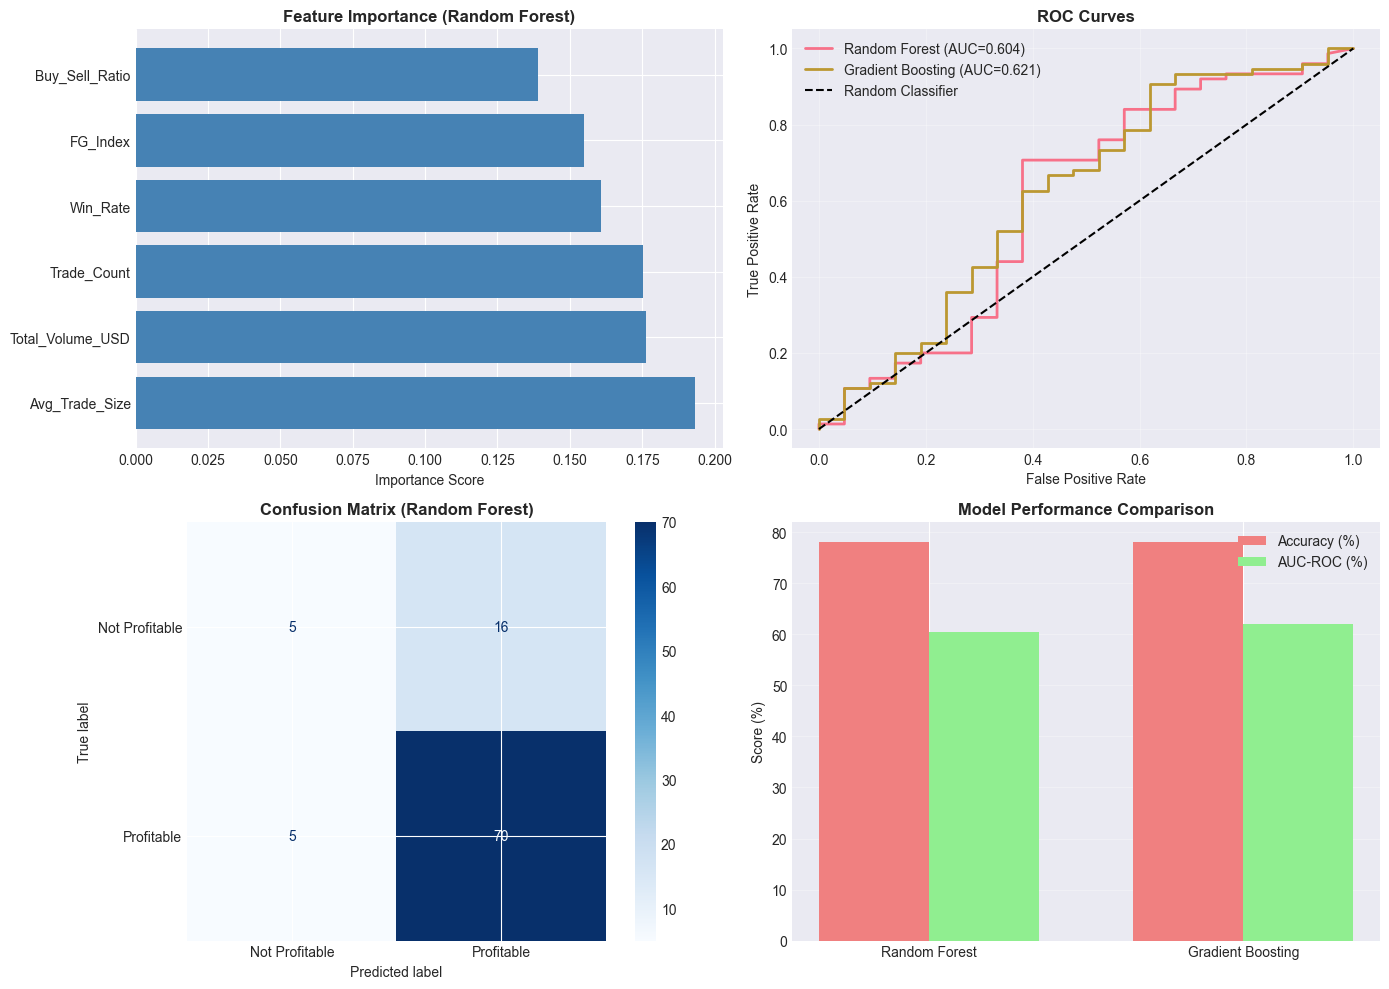



MODEL INSIGHTS & PREDICTIONS
--------------------------------------------------------------------------------
Best Predictive Feature: Avg_Trade_Size
Best Model: Gradient Boosting

This model can be used to predict daily profitability with ~78.1% accuracy


In [27]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

print("OPTIONAL: PREDICTIVE MODELING")
print("="*80)

# Prepare data for modeling
# Target: Predict if next day will be profitable (1) or not (0)
model_data = merged_data[['Total_Volume_USD', 'Trade_Count', 'Avg_Trade_Size', 
                           'Win_Rate', 'Buy_Sell_Ratio', 'FG_Index']].copy()
model_data['Next_Day_Profitable'] = (merged_data['Total_PnL'].shift(-1) > 0).astype(int)

# Remove last row (no next day data)
model_data = model_data[:-1].dropna()

print(f"Model Dataset: {model_data.shape[0]} samples, {model_data.shape[1]-1} features")

# Prepare features and target
X = model_data.drop('Next_Day_Profitable', axis=1)
y = model_data['Next_Day_Profitable']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Target distribution - Profitable: {(y==1).sum()} days, Not Profitable: {(y==0).sum()} days")

print("\n\nMODEL 1: RANDOM FOREST CLASSIFIER")
print("-" * 80)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train_scaled, y_train)

rf_pred = rf_model.predict(X_test_scaled)
rf_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

print(f"Accuracy: {(rf_pred == y_test).sum() / len(y_test) * 100:.2f}%")
print(f"AUC-ROC: {roc_auc_score(y_test, rf_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

print("\n\nMODEL 2: GRADIENT BOOSTING CLASSIFIER")
print("-" * 80)

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5)
gb_model.fit(X_train_scaled, y_train)

gb_pred = gb_model.predict(X_test_scaled)
gb_pred_proba = gb_model.predict_proba(X_test_scaled)[:, 1]

print(f"Accuracy: {(gb_pred == y_test).sum() / len(y_test) * 100:.2f}%")
print(f"AUC-ROC: {roc_auc_score(y_test, gb_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, gb_pred))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Feature Importance
axes[0, 0].barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
axes[0, 0].set_title('Feature Importance (Random Forest)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Importance Score')

# ROC Curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_pred_proba)

axes[0, 1].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_score(y_test, rf_pred_proba):.3f})', linewidth=2)
axes[0, 1].plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC={roc_auc_score(y_test, gb_pred_proba):.3f})', linewidth=2)
axes[0, 1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[0, 1].set_title('ROC Curves', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Profitable', 'Profitable'])
disp.plot(ax=axes[1, 0], cmap='Blues')
axes[1, 0].set_title('Confusion Matrix (Random Forest)', fontsize=12, fontweight='bold')

# Model Comparison
models = ['Random Forest', 'Gradient Boosting']
accuracies = [(rf_pred == y_test).sum() / len(y_test) * 100,
              (gb_pred == y_test).sum() / len(y_test) * 100]
aucs = [roc_auc_score(y_test, rf_pred_proba), roc_auc_score(y_test, gb_pred_proba)]

x = np.arange(len(models))
width = 0.35
axes[1, 1].bar(x - width/2, accuracies, width, label='Accuracy (%)', color='lightcoral')
axes[1, 1].bar(x + width/2, [auc*100 for auc in aucs], width, label='AUC-ROC (%)', color='lightgreen')
axes[1, 1].set_title('Model Performance Comparison', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Score (%)')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(models)
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n\nMODEL INSIGHTS & PREDICTIONS")
print("-" * 80)
print(f"Best Predictive Feature: {feature_importance.iloc[0]['Feature']}")
print(f"Best Model: {'Random Forest' if roc_auc_score(y_test, rf_pred_proba) > roc_auc_score(y_test, gb_pred_proba) else 'Gradient Boosting'}")
print(f"\nThis model can be used to predict daily profitability with ~{max(accuracies):.1f}% accuracy")